### Understanding Pandas Groupby

1. What is groupby() in Pandas?

Think of groupby() as a way to:

Split data into groups based on some criteria (like categories or ranges).
Apply some operation (like sum, mean, count) to each group.
Combine the results into a new DataFrame or Series.
It's like sorting your data into boxes (groups), doing some calculations inside each box, and putting the results back together.



In [ ]:
import pandas as pd

data = {
    'Team': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Player': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6'],
    'Score': [15, 20, 10, 30, 25, 35]
}

df = pd.DataFrame(data)
print(df)


  Team Player  Score
0    A     P1     15
1    A     P2     20
2    B     P3     10
3    B     P4     30
4    C     P5     25
5    C     P6     35


In [ ]:
list(df.groupby('Team'))

[('A',
    Team Player  Score
  0    A     P1     15
  1    A     P2     20),
 ('B',
    Team Player  Score
  2    B     P3     10
  3    B     P4     30),
 ('C',
    Team Player  Score
  4    C     P5     25
  5    C     P6     35)]

In [ ]:
df.groupby('Team')['Score']

In [ ]:
import pandas as pd

import numpy as np
data = {
    'Department': ['HR', 'IT', 'HR', 'IT', 'Finance', 'Finance', 'HR'],
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7'],
    'Salary': [50000, 60000, 52000, 70000, 65000, 62000, 55000],
    'Experience': [2, 5, 3, 7, 4, 6, 1]
}

df = pd.DataFrame(data)


In [ ]:
df

,Department,Employee,Salary,Experience
0,HR,E1,50000,2
1,IT,E2,60000,5
2,HR,E3,52000,3
3,IT,E4,70000,7
4,Finance,E5,65000,4
5,Finance,E6,62000,6
6,HR,E7,55000,1


In [ ]:
dep_group = df.groupby('Department')['Salary'].sum()
dep_group

,Salary
Department,
Finance,127000
HR,157000
IT,130000


In [ ]:
df['total_dep_salary'] = df.groupby('Department')['Salary'].transform(sum)

<ipython-input-233-c84b407ffda9>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['total_dep_salary'] = df.groupby('Department')['Salary'].transform(sum)


In [ ]:
df.drop(columns='percentage_of_dep_salary', inplace=True)

In [ ]:
df

,Department,Employee,Salary,Experience,total_dep_salary
0,HR,E1,50000,2,157000
1,IT,E2,60000,5,130000
2,HR,E3,52000,3,157000
3,IT,E4,70000,7,130000
4,Finance,E5,65000,4,127000
5,Finance,E6,62000,6,127000
6,HR,E7,55000,1,157000


In [ ]:
df.apply(lambda x: round((x['Salary']/ x['total_dep_salary']), 2), axis=1)

,0
0,0.32
1,0.46
2,0.33
3,0.54
4,0.51
5,0.49
6,0.35


In [ ]:
%%time
df.assign(per_of_dep_salary = lambda x: round(x['Salary']/x['total_dep_salary'], 2))

CPU times: user 2.87 ms, sys: 0 ns, total: 2.87 ms
Wall time: 2.79 ms


,Department,Employee,Salary,Experience,total_dep_salary,per_sal,per_of_dep_salary
0,HR,E1,50000,2,157000,0.32,0.32
1,IT,E2,60000,5,130000,0.46,0.46
2,HR,E3,52000,3,157000,0.33,0.33
3,IT,E4,70000,7,130000,0.54,0.54
4,Finance,E5,65000,4,127000,0.51,0.51
5,Finance,E6,62000,6,127000,0.49,0.49
6,HR,E7,55000,1,157000,0.35,0.35


In [ ]:
%%time
df['per_sal'] = round(df['Salary'] / df['total_dep_salary'], 2)
df

CPU times: user 1.02 ms, sys: 0 ns, total: 1.02 ms
Wall time: 1.04 ms


,Department,Employee,Salary,Experience,total_dep_salary,per_sal
0,HR,E1,50000,2,157000,0.32
1,IT,E2,60000,5,130000,0.46
2,HR,E3,52000,3,157000,0.33
3,IT,E4,70000,7,130000,0.54
4,Finance,E5,65000,4,127000,0.51
5,Finance,E6,62000,6,127000,0.49
6,HR,E7,55000,1,157000,0.35


In [ ]:
df.groupby('Department').filter(lambda x: x['Salary'].sum() >= 150000)

,Department,Employee,Salary,Experience,total_dep_salary,per_sal
0,HR,E1,50000,2,157000,0.32
2,HR,E3,52000,3,157000,0.33
6,HR,E7,55000,1,157000,0.35


In [ ]:
df.groupby('Department')['Salary'].idxmax()

pandas.core.series.Series

In [ ]:
df.loc[df.groupby('Department')['Salary'].idxmax()]

,Department,Employee,Salary,Experience,total_dep_salary,per_sal
4,Finance,E5,65000,4,127000,0.51
6,HR,E7,55000,1,157000,0.35
3,IT,E4,70000,7,130000,0.54


In [ ]:
dep_group[dep_group<150000]

,Salary
Department,
Finance,127000
IT,130000


In [ ]:
df.groupby('Department')['Experience'].mean()

,Experience
Department,
Finance,5.0
HR,2.0
IT,6.0


In [ ]:
def assgn_dep_sal(row):
  if row['Department'] == 'HR':
    return round(row['Salary']/157000 * 100, 2)
  if  row['Department'] == 'Finance':
    return round(row['Salary']/127000 * 100, 2)
  if row['Department'] == 'IT':
    return round(row['Salary']/130000 * 100, 2)

In [ ]:
df['percentage_of_dep_salary'] = df.apply(assgn_dep_sal, axis=1)

In [ ]:
df

,Department,Employee,Salary,Experience,percentage_of_dep_salary
0,HR,E1,50000,2,31.85
1,IT,E2,60000,5,46.15
2,HR,E3,52000,3,33.12
3,IT,E4,70000,7,53.85
4,Finance,E5,65000,4,51.18
5,Finance,E6,62000,6,48.82
6,HR,E7,55000,1,35.03


In [ ]:
df.groupby(['Department'])['Salary'].max().to_frame('max_salary')

,max_salary
Department,
Finance,65000
HR,55000
IT,70000


In [ ]:
df.groupby(['Department', 'Employee'])['Salary'].max()

Department  Employee
Finance     E5          65000
            E6          62000
HR          E1          50000
            E3          52000
            E7          55000
IT          E2          60000
            E4          70000
Name: Salary, dtype: int64

In [ ]:
grouped = df.groupby('Department')
print(grouped.groups)
for group_name, group_data in grouped:
  print(f"Group: {group_name}")
  print(f"{group_data}\n")

{'Finance': [4, 5], 'HR': [0, 2, 6], 'IT': [1, 3]}
Group: Finance
  Department Employee  Salary  Experience
4    Finance       E5   65000           4
5    Finance       E6   62000           6

Group: HR
  Department Employee  Salary  Experience
0         HR       E1   50000           2
2         HR       E3   52000           3
6         HR       E7   55000           1

Group: IT
  Department Employee  Salary  Experience
1         IT       E2   60000           5
3         IT       E4   70000           7



In [ ]:
df.loc[df.groupby('Department')['Salary'].idxmax()]

,Department,Employee,Salary,Experience
4,Finance,E5,65000,4
6,HR,E7,55000,1
3,IT,E4,70000,7


In [ ]:
df.loc[df.groupby('Department')['Salary'].idxmin()]

,Department,Employee,Salary,Experience
5,Finance,E6,62000,6
0,HR,E1,50000,2
1,IT,E2,60000,5


In [ ]:
df[df['Department'] == 'HR']

,Department,Employee,Salary,Experience
0,HR,E1,50000,2
2,HR,E3,52000,3
6,HR,E7,55000,1


In [ ]:
df[a]

,Department,Employee,Salary,Experience
2,HR,E3,52000,3
3,IT,E4,70000,7
5,Finance,E6,62000,6
6,HR,E7,55000,1


In [ ]:
def flter(group):
  print(f"group_name: {group.name}")
  print(f"{group}\n")
  return group['Experience'].mean() > 3

In [ ]:
df.groupby('Department').filter(flter)

group_name: Finance
  Department Employee  Salary  Experience
4    Finance       E5   65000           4
5    Finance       E6   62000           6

group_name: HR
  Department Employee  Salary  Experience
0         HR       E1   50000           2
2         HR       E3   52000           3
6         HR       E7   55000           1

group_name: IT
  Department Employee  Salary  Experience
1         IT       E2   60000           5
3         IT       E4   70000           7



,Department,Employee,Salary,Experience
1,IT,E2,60000,5
3,IT,E4,70000,7
4,Finance,E5,65000,4
5,Finance,E6,62000,6


In [ ]:
a = [False, False, True, True,  False, True, True]

In [ ]:
df.loc[(2, 3),]

,Department,Employee,Salary,Experience
2,HR,E3,52000,3
3,IT,E4,70000,7


In [ ]:
#Grouping by multiple columns

new_grp = df.groupby(['Department', 'Experience']).agg({
    'Salary': ['mean', 'max', 'min']
})
new_grp

Salary              
                          mean    max    min
Department Experience                       
Finance    4           65000.0  65000  65000
           6           62000.0  62000  62000
HR         1           55000.0  55000  55000
           2           50000.0  50000  50000
           3           52000.0  52000  52000
IT         5           60000.0  60000  60000
           7           70000.0  70000  70000

In [ ]:
#Custom Aggregations with agg()

result = df.groupby('Department').agg({
    'Salary': ['max', 'mean', 'min'],
    'Experience': 'mean'
})
result

Salary                      Experience
              max          mean    min       mean
Department                                       
Finance     65000  63500.000000  62000        5.0
HR          55000  52333.333333  50000        2.0
IT          70000  65000.000000  60000        6.0

In [ ]:
#filtering to keep only those groups that satisfy a condition.

flter_grp = df.groupby('Department').filter(lambda x: x['Experience'].mean()>5)
flter_grp

,Department,Employee,Salary,Experience
1,IT,E2,60000,5
3,IT,E4,70000,7


In [ ]:
list(df.groupby('Department'))

[('Finance',
    Department Employee  Salary  Experience
  4    Finance       E5   65000           4
  5    Finance       E6   62000           6),
 ('HR',
    Department Employee  Salary  Experience
  0         HR       E1   50000           2
  2         HR       E3   52000           3
  6         HR       E7   55000           1),
 ('IT',
    Department Employee  Salary  Experience
  1         IT       E2   60000           5
  3         IT       E4   70000           7)]

In [ ]:
df.groupby('Department').agg({
    'Salary': 'mean',
    'Experience': 'mean'
})

,Salary,Experience
Department,,
Finance,63500.000000,5.0
HR,52333.333333,2.0
IT,65000.000000,6.0


In [ ]:
df.groupby('Department').agg(
    salary_average = ('Salary', 'mean'),
    average_experience = ('Experience', 'mean'),
    max_experience = ('Experience', 'max'),
    min_experience = ('Experience', 'min')
)

,salary_average,average_experience,max_experience,min_experience
Department,,,,
Finance,63500.000000,5.0,6,4
HR,52333.333333,2.0,3,1
IT,65000.000000,6.0,7,5


In [ ]:
gr = df.groupby('Department')
gr[['Salary', 'Experience']].agg(['sum', 'mean'])

Salary               Experience     
               sum          mean        sum mean
Department                                      
Finance     127000  63500.000000         10  5.0
HR          157000  52333.333333          6  2.0
IT          130000  65000.000000         12  6.0

In [ ]:
df2 = gr.agg(
    {
        'Salary': ['sum', 'max', 'min']
    }
).sort_values(by=('Salary', 'sum'))

In [ ]:
result = df.groupby('Department').agg(
    salary_median=('Salary', 'median'),
)
result

,salary_median
Department,
Finance,63500.0
HR,52000.0
IT,65000.0


range of salary for each dep

In [ ]:
def calc_range(group_df):
  print(group_df)
  return (group_df['Salary'].max() - group_df['Salary'].min())

In [ ]:
def calc_range2(sal):
  print(sal)
  return sal.max() - sal.min()

In [ ]:
range = gr.apply(calc_range)
range

  Department Employee  Salary  Experience
4    Finance       E5   65000           4
5    Finance       E6   62000           6
  Department Employee  Salary  Experience
0         HR       E1   50000           2
2         HR       E3   52000           3
6         HR       E7   55000           1
  Department Employee  Salary  Experience
1         IT       E2   60000           5
3         IT       E4   70000           7


<ipython-input-179-90880e413eea>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  range = gr.apply(calc_range)


,0
Department,
Finance,3000
HR,5000
IT,10000


In [ ]:
range = gr.apply(calc_range, include_groups=False)
range

  Employee  Salary  Experience
4       E5   65000           4
5       E6   62000           6
  Employee  Salary  Experience
0       E1   50000           2
2       E3   52000           3
6       E7   55000           1
  Employee  Salary  Experience
1       E2   60000           5
3       E4   70000           7


,0
Department,
Finance,3000
HR,5000
IT,10000


In [ ]:
range2  = df.groupby('Department')['Salary'].apply(calc_range2)
range2

4    65000
5    62000
Name: Finance, dtype: int64
0    50000
2    52000
6    55000
Name: HR, dtype: int64
1    60000
3    70000
Name: IT, dtype: int64


,Salary
Department,
Finance,3000
HR,5000
IT,10000


In [ ]:
list(df.groupby('Department')['Salary'])

[('Finance',
  4    65000
  5    62000
  Name: Salary, dtype: int64),
 ('HR',
  0    50000
  2    52000
  6    55000
  Name: Salary, dtype: int64),
 ('IT',
  1    60000
  3    70000
  Name: Salary, dtype: int64)]

In [ ]:
def calculate(ser):
  print(ser)
  return ser.max() - ser.min()

In [ ]:
result = df.groupby('Department').agg(
    salary_range=('Salary', lambda x: x.max() - x.min())
).reset_index()
result

,Department,salary_range
0,Finance,3000
1,HR,5000
2,IT,10000


In [ ]:
result2 = df.groupby('Department').Salary.transform(lambda x: x.max() - x.min())
result2

,Salary
0,5000
1,10000
2,5000
3,10000
4,3000
5,3000
6,5000


In [ ]:
import pandas as pd

data = {
    'Category': ['A', 'B', 'A', 'B', 'C', 'C', 'A', 'B', 'C'],
    'Value1': [10, 20, 15, 25, 30, 35, 5, 40, 45],
    'Value2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Value3': [100, 200, 150, 250, 300, 350, 50, 400, 450],
}

dff = pd.DataFrame(data)
print(dff)


  Category  Value1  Value2  Value3
0        A      10       1     100
1        B      20       2     200
2        A      15       3     150
3        B      25       4     250
4        C      30       5     300
5        C      35       6     350
6        A       5       7      50
7        B      40       8     400
8        C      45       9     450


In [ ]:
dff.groupby('Category').sum()

,Value1,Value2,Value3
Category,,,
A,30,11,300
B,85,14,850
C,110,20,1100


In [ ]:
df.groupby('Department')['Salary'].max()

,Salary
Department,
Finance,65000
HR,55000
IT,70000


In [ ]:
df.groupby('Department').agg({
    'Salary': 'max'
})

,Salary
Department,
Finance,65000
HR,55000
IT,70000


In [ ]:
df.groupby('Department')['Salary'].agg(['max', 'mean']).reset_index()

,Department,max,mean
0,Finance,65000,63500.000000
1,HR,55000,52333.333333
2,IT,70000,65000.000000


In [ ]:
df.groupby('Department').agg(
    max_salary = ('Salary', 'max'),
    mean_salary = ('Salary', 'mean')
)

,max_salary,mean_salary
Department,,
Finance,65000,63500.000000
HR,55000,52333.333333
IT,70000,65000.000000


In [ ]:
df.groupby('Department').sum()

,Employee,Salary,Experience
Department,,,
Finance,E5E6,127000,10
HR,E1E3E7,157000,6
IT,E2E4,130000,12


In [ ]:
df

,Department,Employee,Salary,Experience
0,HR,E1,50000,2
1,IT,E2,60000,5
2,HR,E3,52000,3
3,IT,E4,70000,7
4,Finance,E5,65000,4
5,Finance,E6,62000,6
6,HR,E7,55000,1


In [ ]:
df.Employee.dtypes

dtype('O')

In [ ]:
df.groupby(['Department', 'Employee'])['Salary'].max().reset_index().sort_values(by=['Department', 'Salary'], ascending=[True, False])

,Department,Employee,Salary
0,Finance,E5,65000
1,Finance,E6,62000
4,HR,E7,55000
3,HR,E3,52000
2,HR,E1,50000
6,IT,E4,70000
5,IT,E2,60000


Top 2 salaries from each department

In [ ]:
df.nlargest(5, columns='Salary')

,Department,Employee,Salary,Experience
3,IT,E4,70000,7
4,Finance,E5,65000,4
5,Finance,E6,62000,6
1,IT,E2,60000,5
6,HR,E7,55000,1


In [ ]:
df.nsmallest(5, columns='Salary')

,Department,Employee,Salary,Experience
0,HR,E1,50000,2
2,HR,E3,52000,3
6,HR,E7,55000,1
1,IT,E2,60000,5
5,Finance,E6,62000,6


In [ ]:
#calculating sum of salaries for each department using apply
df.groupby('Department').apply(lambda x: x['Salary'].sum(), include_groups=False)

,0
Department,
Finance,127000
HR,157000
IT,130000


In [ ]:
#top2 employees with the highest salaries in each department


In [ ]:
df.groupby('Department').apply(lambda x: x.nlargest(2, 'Salary'), include_groups=False)

Employee  Salary  Experience
Department                               
Finance    4       E5   65000           4
           5       E6   62000           6
HR         6       E7   55000           1
           2       E3   52000           3
IT         3       E4   70000           7
           1       E2   60000           5

In [ ]:
df.groupby('Department').apply(lambda x: x.nlargest(2, 'Salary'), include_groups=False).reset_index()

,Department,level_1,Employee,Salary,Experience
0,Finance,4,E5,65000,4
1,Finance,5,E6,62000,6
2,HR,6,E7,55000,1
3,HR,2,E3,52000,3
4,IT,3,E4,70000,7
5,IT,1,E2,60000,5


- Standard Deviation of salaries in each department

In [ ]:
df

,Department,Employee,Salary,Experience
0,HR,E1,50000,2
1,IT,E2,60000,5
2,HR,E3,52000,3
3,IT,E4,70000,7
4,Finance,E5,65000,4
5,Finance,E6,62000,6
6,HR,E7,55000,1


In [ ]:
def find_std(group_salary):
  mean_sal = group_salary.mean()
  return ((group_salary - mean_sal)**2).sum()

In [ ]:
df.groupby('Department').agg(
    mean_salaries_dep = ('Salary', 'mean'),
    std_deviation = ('Salary', find_std)
)

,mean_salaries_dep,std_deviation
Department,,
Finance,63500.000000,4.500000e+06
HR,52333.333333,1.266667e+07
IT,65000.000000,5.000000e+07


In [ ]:
def hel(x):
  print(x)
  print(f"x_mean: {x.mean()}")
  print(x>x.mean())
  print()
  return x>x.mean()

In [ ]:
df['is_sal_greater_avg_dep_sal'] = df.groupby('Department')['Salary'].transform(hel)

4    65000
5    62000
Name: Finance, dtype: int64
x_mean: 63500.0
4     True
5    False
Name: Finance, dtype: bool

0    50000
2    52000
6    55000
Name: HR, dtype: int64
x_mean: 52333.333333333336
0    False
2    False
6     True
Name: HR, dtype: bool

1    60000
3    70000
Name: IT, dtype: int64
x_mean: 65000.0
1    False
3     True
Name: IT, dtype: bool



In [ ]:
df

,Department,Employee,Salary,Experience,is_sal_greater_avg_dep_sal
0,HR,E1,50000,2,False
1,IT,E2,60000,5,False
2,HR,E3,52000,3,False
3,IT,E4,70000,7,True
4,Finance,E5,65000,4,True
5,Finance,E6,62000,6,False
6,HR,E7,55000,1,True


In [ ]:
experience_dist = df.groupby('Department')['Experience'].apply(list)
print(experience_dist)
print(type(experience_dist))
print(experience_dist)

Department
Finance       [4, 6]
HR         [2, 3, 1]
IT            [5, 7]
Name: Experience, dtype: object
<class 'pandas.core.series.Series'>
Department
Finance       [4, 6]
HR         [2, 3, 1]
IT            [5, 7]
Name: Experience, dtype: object


In [ ]:
list(experience_dist.reset_index().items())

[('Department',
  0    Finance
  1         HR
  2         IT
  Name: Department, dtype: object),
 ('Experience',
  0       [4, 6]
  1    [2, 3, 1]
  2       [5, 7]
  Name: Experience, dtype: object)]

In [ ]:
list(experience_dist.items())

[('Finance', [4, 6]), ('HR', [2, 3, 1]), ('IT', [5, 7])]

In [ ]:
list(df.items())

[('Department',
  0         HR
  1         IT
  2         HR
  3         IT
  4    Finance
  5    Finance
  6         HR
  Name: Department, dtype: object),
 ('Employee',
  0    E1
  1    E2
  2    E3
  3    E4
  4    E5
  5    E6
  6    E7
  Name: Employee, dtype: object),
 ('Salary',
  0    50000
  1    60000
  2    52000
  3    70000
  4    65000
  5    62000
  6    55000
  Name: Salary, dtype: int64),
 ('Experience',
  0    2
  1    5
  2    3
  3    7
  4    4
  5    6
  6    1
  Name: Experience, dtype: int64),
 ('is_sal_greater_avg_dep_sal',
  0    False
  1    False
  2    False
  3     True
  4     True
  5    False
  6     True
  Name: is_sal_greater_avg_dep_sal, dtype: bool)]

In [ ]:
ser = df['Department'].copy()
print(ser)
list(ser.items())

0         HR
1         IT
2         HR
3         IT
4    Finance
5    Finance
6         HR
Name: Department, dtype: object


[(0, 'HR'),
 (1, 'IT'),
 (2, 'HR'),
 (3, 'IT'),
 (4, 'Finance'),
 (5, 'Finance'),
 (6, 'HR')]

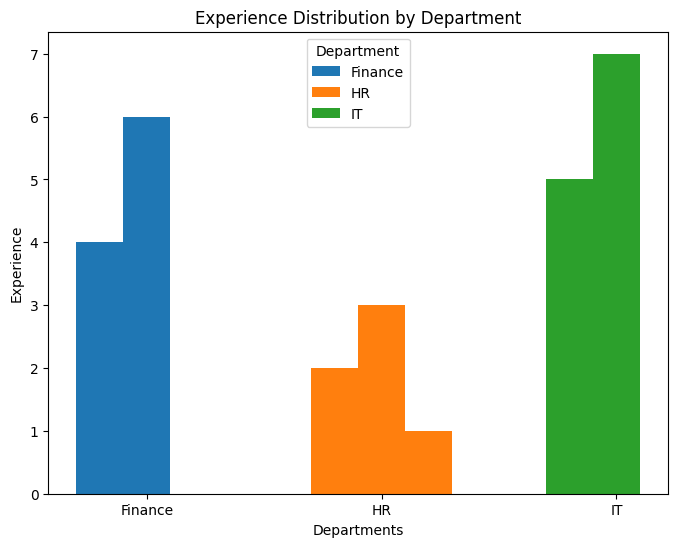

In [ ]:
experience_dist = df.groupby('Department')['Experience']

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Bar width for each department (spacing between bars)
bar_width = 0.2
index = np.arange(len(experience_dist))  # The positions of the bars on x-axis

# Loop through the groups and create a bar plot for each department
for i, (department, experience) in enumerate(experience_dist):
    # Set the position of bars for each department
    ax.bar(index[i] + np.arange(len(experience)) * bar_width, experience, bar_width, label=department)

# Add labels and title
ax.set_xlabel('Departments')
ax.set_ylabel('Experience')
ax.set_title('Experience Distribution by Department')
ax.set_xticks(index + bar_width * (len(experience_dist) - 1) / 2)
ax.set_xticklabels(experience_dist.groups.keys())  # Set department names on x-axis
ax.legend(title='Department')

# Display the plot
plt.show()

In [ ]:
list(pd.Series([1,2, 3, 4,]))

[1, 2, 3, 4]